In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/titanic_data_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
len(df)

891

In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.isna().sum().sum()

866

#### The NaN problem will be solved using the mean of the respective column

In [6]:
df.mean()

/tmp/ipykernel_54486/3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [7]:
mean_age = df.mean()["Age"]
mean_age

/tmp/ipykernel_54486/3064594116.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_age = df.mean()["Age"]


29.69911764705882

In [8]:
df["Age"].fillna(mean_age, inplace=True)

In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### removing the lines where embarked is nan

In [10]:
df.dropna(subset=["Embarked"], inplace=True)

In [11]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

#### solving the cabin nan problem

In [12]:
df["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 889, dtype: object

In [13]:
A = df["Cabin"].str.startswith("A").sum()
A

15

In [14]:
B = df["Cabin"].str.startswith("B").sum()
B

45

In [15]:
C = df["Cabin"].str.startswith("C").sum()
C

59

In [16]:
D = df["Cabin"].str.startswith("D").sum()
D

33

In [17]:
E = df["Cabin"].str.startswith("E").sum()
E

32

In [18]:
F = df["Cabin"].str.startswith("F").sum()
F

13

In [19]:
G = df["Cabin"].str.startswith("G").sum()
G

4

In [20]:
total_cabin = A + B + C + D + E + F + G
print(total_cabin)
perA = A/total_cabin
perB = B/total_cabin
perC = C/total_cabin
perD = D/total_cabin
perE = E/total_cabin
perF = F/total_cabin
perG = G/total_cabin

201


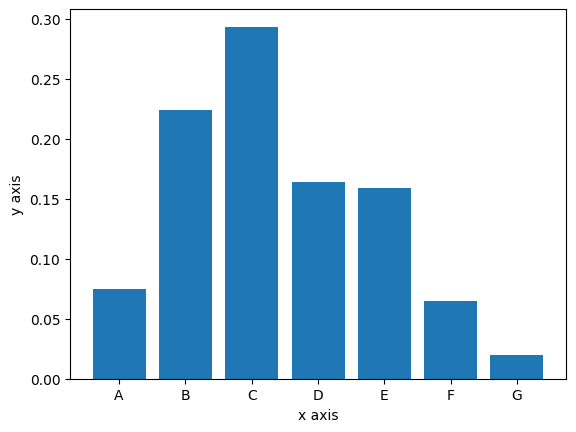

In [21]:
x = ["A", "B", "C", "D", "E", "F", "G"]
y = [perA, perB, perC, perD, perE, perF, perG]
plt.bar(x, y)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.show()

#### I will folow this distribution to fill the nan in the cabin column

In [22]:
total_cabin_nan = df.isna()["Cabin"].sum()
print(total_cabin_nan)
fill_A = perA * total_cabin_nan
fill_B = perB * total_cabin_nan
fill_C = perC * total_cabin_nan
fill_D = perD * total_cabin_nan
fill_E = perE * total_cabin_nan
fill_F = perF * total_cabin_nan
fill_G = perG * total_cabin_nan
total_to_fill = fill_A + fill_B + fill_C + fill_D + fill_E + fill_F + fill_G
print(total_to_fill)

687
687.0


#### working on the number of the cabin (the letter is solved)

In [23]:
perA1 = df["Cabin"].str.startswith("A1").sum() / A
perA2 = df["Cabin"].str.startswith("A2").sum() / A
perA3 = df["Cabin"].str.startswith("A3").sum() / A
perA4 = df["Cabin"].str.startswith("A4").sum() / A
perA5 = df["Cabin"].str.startswith("A5").sum() / A
perA6 = df["Cabin"].str.startswith("A6").sum() / A
perA7 = df["Cabin"].str.startswith("A7").sum() / A
perA8 = df["Cabin"].str.startswith("A8").sum() / A

fill_A1 = perA1 * fill_A
fill_A2 = perA2 * fill_A
fill_A3 = perA3 * fill_A
fill_A4 = perA4 * fill_A
fill_A5 = perA5 * fill_A
fill_A6 = perA6 * fill_A
fill_A7 = perA7 * fill_A
fill_A8 = perA8 * fill_A

total_to_fill_A = fill_A1 + fill_A2 + fill_A3 + fill_A4 + fill_A5 + fill_A6 + fill_A7 + fill_A8

print(fill_A)
print(total_to_fill_A)

51.26865671641791
51.26865671641791


In [24]:
perB1 = df["Cabin"].str.startswith("B1").sum() / B
perB2 = df["Cabin"].str.startswith("B2").sum() / B
perB3 = df["Cabin"].str.startswith("B3").sum() / B
perB4 = df["Cabin"].str.startswith("B4").sum() / B
perB5 = df["Cabin"].str.startswith("B5").sum() / B
perB6 = df["Cabin"].str.startswith("B6").sum() / B
perB7 = df["Cabin"].str.startswith("B7").sum() / B
perB8 = df["Cabin"].str.startswith("B8").sum() / B
perB9 = df["Cabin"].str.startswith("B9").sum() / B

fill_B1 = perB1 * fill_B
fill_B2 = perB2 * fill_B
fill_B3 = perB3 * fill_B
fill_B4 = perB4 * fill_B
fill_B5 = perB5 * fill_B
fill_B6 = perB6 * fill_B
fill_B7 = perB7 * fill_B
fill_B8 = perB8 * fill_B
fill_B9 = perB9 * fill_B

total_to_fill_B = fill_B1 + fill_B2 + fill_B3 + fill_B4 + fill_B5 + fill_B6 + fill_B7 + fill_B8 + fill_B9

print(fill_B)
print(total_to_fill_B)

153.80597014925374
153.8059701492537


In [25]:
perC1 = df["Cabin"].str.startswith("C1").sum() / C
perC2 = df["Cabin"].str.startswith("C2").sum() / C
perC3 = df["Cabin"].str.startswith("C3").sum() / C
perC4 = df["Cabin"].str.startswith("C4").sum() / C
perC5 = df["Cabin"].str.startswith("C5").sum() / C
perC6 = df["Cabin"].str.startswith("C6").sum() / C
perC7 = df["Cabin"].str.startswith("C7").sum() / C
perC8 = df["Cabin"].str.startswith("C8").sum() / C
perC9 = df["Cabin"].str.startswith("C9").sum() / C

fill_C1 = perC1 * fill_C
fill_C2 = perC2 * fill_C
fill_C3 = perC3 * fill_C
fill_C4 = perC4 * fill_C
fill_C5 = perC5 * fill_C
fill_C6 = perC6 * fill_C
fill_C7 = perC7 * fill_C
fill_C8 = perC8 * fill_C
fill_C9 = perC9 * fill_C

total_to_fill_C = fill_C1 + fill_C2 + fill_C3 + fill_C4 + fill_C5 + fill_C6 + fill_C7 + fill_C8 + fill_C9

print(fill_C)
print(total_to_fill_C)

201.65671641791045
201.65671641791045


In [26]:
perD1 = df["Cabin"].str.startswith("D1").sum() / D
perD2 = df["Cabin"].str.startswith("D2").sum() / D
perD3 = df["Cabin"].str.startswith("D3").sum() / D
perD4 = df["Cabin"].str.startswith("D4").sum() / D
perD5 = df["Cabin"].str.startswith("D5").sum() / D
perD6 = df["Cabin"].str.startswith("D6").sum() / D
perD7 = df["Cabin"].str.startswith("D7").sum() / D
perD8 = df["Cabin"].str.startswith("D8").sum() / D
perD9 = df["Cabin"].str.startswith("D9").sum() / D

fill_D1 = perD1 * fill_D
fill_D2 = perD2 * fill_D
fill_D3 = perD3 * fill_D
fill_D4 = perD4 * fill_D
fill_D5 = perD5 * fill_D
fill_D6 = perD6 * fill_D
fill_D7 = perD7 * fill_D
fill_D8 = perD8 * fill_D
fill_D9 = perD9 * fill_D

total_to_fill_D = fill_D1 + fill_D2 + fill_D3 + fill_D4 + fill_D5 + fill_D6 + fill_D7 + fill_D8 + fill_D9

print(fill_D)
print(total_to_fill_D)

112.7910447761194
102.53731343283582


#### continuing: filling nan in cabin with C

In [27]:
df["Cabin"].fillna("C", inplace=True)

In [28]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [29]:
new_order = ["Name", "PassengerId", "Pclass", "Sex", "Age", "Parch", "Ticket", "Fare", "Cabin", "Embarked", "Survived"]
df = df[new_order]
df

,Name,PassengerId,Pclass,Sex,Age,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,"Braund, Mr. Owen Harris",1,3,male,22.000000,0,A/5 21171,7.2500,C,S,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,female,38.000000,0,PC 17599,71.2833,C85,C,1
2,"Heikkinen, Miss. Laina",3,3,female,26.000000,0,STON/O2. 3101282,7.9250,C,S,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,female,35.000000,0,113803,53.1000,C123,S,1
4,"Allen, Mr. William Henry",5,3,male,35.000000,0,373450,8.0500,C,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",887,2,male,27.000000,0,211536,13.0000,C,S,0
887,"Graham, Miss. Margaret Edith",888,1,female,19.000000,0,112053,30.0000,B42,S,1
888,"Johnston, Miss. Catherine Helen ""Carrie""",889,3,female,29.699118,2,W./C. 6607,23.4500,C,S,0
889,"Behr, Mr. Karl Howell",890,1,male,26.000000,0,111369,30.0000,C148,C,1


In [30]:
df = df.loc[:, "PassengerId": "Survived"]
df

,PassengerId,Pclass,Sex,Age,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,male,22.000000,0,A/5 21171,7.2500,C,S,0
1,2,1,female,38.000000,0,PC 17599,71.2833,C85,C,1
2,3,3,female,26.000000,0,STON/O2. 3101282,7.9250,C,S,1
3,4,1,female,35.000000,0,113803,53.1000,C123,S,1
4,5,3,male,35.000000,0,373450,8.0500,C,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,2,male,27.000000,0,211536,13.0000,C,S,0
887,888,1,female,19.000000,0,112053,30.0000,B42,S,1
888,889,3,female,29.699118,2,W./C. 6607,23.4500,C,S,0
889,890,1,male,26.000000,0,111369,30.0000,C148,C,1


In [31]:
df.drop(columns=['Ticket', 'Fare', 'PassengerId'], inplace=True)
df

,Pclass,Sex,Age,Parch,Cabin,Embarked,Survived
0,3,male,22.000000,0,C,S,0
1,1,female,38.000000,0,C85,C,1
2,3,female,26.000000,0,C,S,1
3,1,female,35.000000,0,C123,S,1
4,3,male,35.000000,0,C,S,0
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,C,S,0
887,1,female,19.000000,0,B42,S,1
888,3,female,29.699118,2,C,S,0
889,1,male,26.000000,0,C148,C,1


#### conventions

In [32]:
# Pclass = x1
print(df["Pclass"].unique())
df = df.rename(columns={'Pclass': 'x1'})
print(df)

[3 1 2]
     x1     Sex        Age  Parch Cabin Embarked  Survived
0     3    male  22.000000      0     C        S         0
1     1  female  38.000000      0   C85        C         1
2     3  female  26.000000      0     C        S         1
3     1  female  35.000000      0  C123        S         1
4     3    male  35.000000      0     C        S         0
..   ..     ...        ...    ...   ...      ...       ...
886   2    male  27.000000      0     C        S         0
887   1  female  19.000000      0   B42        S         1
888   3  female  29.699118      2     C        S         0
889   1    male  26.000000      0  C148        C         1
890   3    male  32.000000      0     C        Q         0

[889 rows x 7 columns]


In [33]:
# Sex = x2
# male = 1
# female = 0
print(df["Sex"].unique())
df["Sex"] = df["Sex"].replace({"male" : 1, "female" : 0})
df = df.rename(columns={'Sex': 'x2'})
print(df)

['male' 'female']
     x1  x2        Age  Parch Cabin Embarked  Survived
0     3   1  22.000000      0     C        S         0
1     1   0  38.000000      0   C85        C         1
2     3   0  26.000000      0     C        S         1
3     1   0  35.000000      0  C123        S         1
4     3   1  35.000000      0     C        S         0
..   ..  ..        ...    ...   ...      ...       ...
886   2   1  27.000000      0     C        S         0
887   1   0  19.000000      0   B42        S         1
888   3   0  29.699118      2     C        S         0
889   1   1  26.000000      0  C148        C         1
890   3   1  32.000000      0     C        Q         0

[889 rows x 7 columns]


In [34]:
#Age = x3
# 0 < age < 10 -> 1
# 10 < age < 20 -> 2
# 20 < age < 30 -> 3
# 30 < age < 40 -> 4
# 40 < age < 50 -> 5
# 50 < age < 60 -> 6
# 60 < age < 70 -> 7
# 70 < age < 80 -> 8
print(df["Age"].max())
print(df["Age"].min())

df['Age'] = df['Age'].apply(
	lambda x: 1 if 0 <= x < 10 
	else 2 if 10 <= x < 20 
	else 3 if 20 <= x < 30
	else 4 if 30 <= x < 40
	else 5 if 40 <= x < 50
	else 6 if 50 <= x < 60
	else 7 if 60 <= x < 70
	else 8)
df = df.rename(columns={'Age': 'x3'})
df

80.0
0.42


,x1,x2,x3,Parch,Cabin,Embarked,Survived
0,3,1,3,0,C,S,0
1,1,0,4,0,C85,C,1
2,3,0,3,0,C,S,1
3,1,0,4,0,C123,S,1
4,3,1,4,0,C,S,0
...,...,...,...,...,...,...,...
886,2,1,3,0,C,S,0
887,1,0,2,0,B42,S,1
888,3,0,3,2,C,S,0
889,1,1,3,0,C148,C,1


In [35]:
# Parch = x4
print(df["Parch"].unique())
df = df.rename(columns={'Parch': 'x4'})
df

[0 1 2 5 3 4 6]


,x1,x2,x3,x4,Cabin,Embarked,Survived
0,3,1,3,0,C,S,0
1,1,0,4,0,C85,C,1
2,3,0,3,0,C,S,1
3,1,0,4,0,C123,S,1
4,3,1,4,0,C,S,0
...,...,...,...,...,...,...,...
886,2,1,3,0,C,S,0
887,1,0,2,0,B42,S,1
888,3,0,3,2,C,S,0
889,1,1,3,0,C148,C,1


In [36]:
# Cabin = x5
# A = 1
# B = 2
# C = 3
# D = 4
# E = 5
# F = 6
# G = 7
# print(df["Cabin"].unique())

df['Cabin'] = df['Cabin'].apply(
	lambda x: 1 if x[0] == "A" 
	else 2 if x[0] == "B"
	else 3 if x[0] == "C"
	else 4 if x[0] == "D"
	else 5 if x[0] == "E"
	else 6 if x[0] == "F"
	else 7)
df = df.rename(columns={'Cabin': 'x5'})
df

,x1,x2,x3,x4,x5,Embarked,Survived
0,3,1,3,0,3,S,0
1,1,0,4,0,3,C,1
2,3,0,3,0,3,S,1
3,1,0,4,0,3,S,1
4,3,1,4,0,3,S,0
...,...,...,...,...,...,...,...
886,2,1,3,0,3,S,0
887,1,0,2,0,2,S,1
888,3,0,3,2,3,S,0
889,1,1,3,0,3,C,1


In [37]:
# Embarked = x6
# S = 1
# C = 2
# Q = 3
print(df["Embarked"].unique())

df['Embarked'] = df['Embarked'].apply(
	lambda x: 1 if x == "S" 
	else 2 if x == "C"
	else 3)
df = df.rename(columns={'Embarked': 'x6'})
df

['S' 'C' 'Q']


,x1,x2,x3,x4,x5,x6,Survived
0,3,1,3,0,3,1,0
1,1,0,4,0,3,2,1
2,3,0,3,0,3,1,1
3,1,0,4,0,3,1,1
4,3,1,4,0,3,1,0
...,...,...,...,...,...,...,...
886,2,1,3,0,3,1,0
887,1,0,2,0,2,1,1
888,3,0,3,2,3,1,0
889,1,1,3,0,3,2,1


In [38]:
# Survived = reference
# 0 = Red 
# 1 = Green 
print(df["Survived"].unique())

df['Survived'] = df['Survived'].apply(
	lambda x: "red" if x == 0 
	else "green")
df = df.rename(columns={'Survived': 'reference'})
df

[0 1]


,x1,x2,x3,x4,x5,x6,reference
0,3,1,3,0,3,1,red
1,1,0,4,0,3,2,green
2,3,0,3,0,3,1,green
3,1,0,4,0,3,1,green
4,3,1,4,0,3,1,red
...,...,...,...,...,...,...,...
886,2,1,3,0,3,1,red
887,1,0,2,0,2,1,green
888,3,0,3,2,3,1,red
889,1,1,3,0,3,2,green


In [39]:
df.to_csv("data/oiled_titanic_data_train.csv", index=False)